## Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn.cluster import KMeans

from scipy.stats import norm
from scipy import stats

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.model_selection import train_test_split

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

## Load and Explore the Dataset

In [3]:
df = pd.read_csv('2019.csv')

In [4]:
# Check if the Data loaded correctly
df.head()

,Year,Country,Continent,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust,Dystopia Residual
0,2019,Finland,Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,NaN
1,2019,Denmark,Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,NaN
2,2019,Norway,Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NaN
3,2019,Iceland,Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,NaN
4,2019,Netherlands,Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NaN


In [5]:
df.tail()

,Year,Country,Continent,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust,Dystopia Residual
151,2019,Rwanda,Africa,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,NaN
152,2019,Tanzania,Africa,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,NaN
153,2019,Afghanistan,Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,NaN
154,2019,Central African Republic,Africa,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN
155,2019,South Sudan,Africa,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,NaN


In [6]:
df.shape

(156, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               156 non-null    int64  
 1   Country            156 non-null    object 
 2   Continent          156 non-null    object 
 3   Happiness_Rank     156 non-null    int64  
 4   Happiness_Score    156 non-null    float64
 5   Economy            156 non-null    float64
 6   Social_Support     156 non-null    float64
 7   Health             156 non-null    float64
 8   Freedom            156 non-null    float64
 9   Generosity         156 non-null    float64
 10  Trust              156 non-null    float64
 11  Dystopia Residual  0 non-null      float64
dtypes: float64(8), int64(2), object(2)
memory usage: 14.8+ KB


In [8]:
#Check for Column Names
df.columns

Index(['Year', 'Country', 'Continent', 'Happiness_Rank', 'Happiness_Score',
       'Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust',
       'Dystopia Residual'],
      dtype='object')

In [9]:
#Get the Stats on the Data
df.describe()

,Year,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust,Dystopia Residual
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,0.0
mean,2019.0,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603,NaN
std,0.0,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538,NaN
min,2019.0,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2019.0,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000,NaN
50%,2019.0,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500,NaN
75%,2019.0,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250,NaN
max,2019.0,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000,NaN


In [10]:
# Checking Null values
df.isnull().sum()

Year                   0
Country                0
Continent              0
Happiness_Rank         0
Happiness_Score        0
Economy                0
Social_Support         0
Health                 0
Freedom                0
Generosity             0
Trust                  0
Dystopia Residual    156
dtype: int64

In [11]:
df.isnull().sum()/len(df)

Year                 0.0
Country              0.0
Continent            0.0
Happiness_Rank       0.0
Happiness_Score      0.0
Economy              0.0
Social_Support       0.0
Health               0.0
Freedom              0.0
Generosity           0.0
Trust                0.0
Dystopia Residual    1.0
dtype: float64

In [12]:
df2 = df.drop(['Dystopia Residual', 'Year'], 1) 

In [13]:
df2.columns

Index(['Country', 'Continent', 'Happiness_Rank', 'Happiness_Score', 'Economy',
       'Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust'],
      dtype='object')

In [14]:
df2.shape

(156, 10)

In [15]:
df2.isnull().sum()

Country            0
Continent          0
Happiness_Rank     0
Happiness_Score    0
Economy            0
Social_Support     0
Health             0
Freedom            0
Generosity         0
Trust              0
dtype: int64

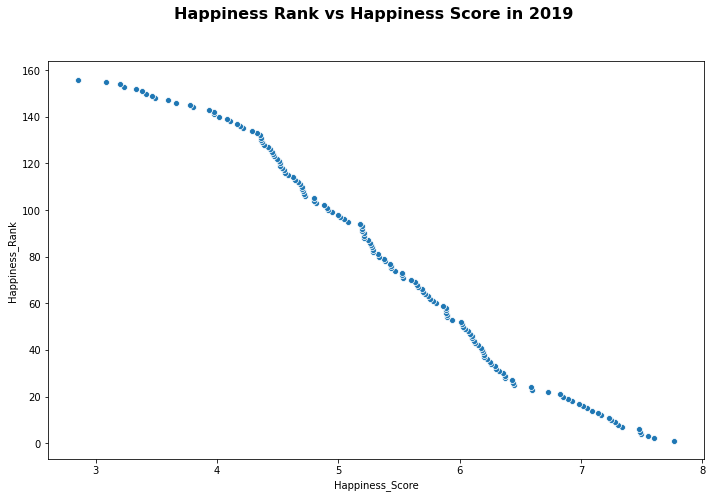

In [16]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot("Happiness_Score","Happiness_Rank", data=df2)
ax.text(x=0.5, y=1.1, s='Happiness Rank vs Happiness Score in 2019 ', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#plt.ylim(0, 8)
#plt.xlim(0, 1.8)

fig.tight_layout()
plt.show()

- The higher the score, the lower the numerical rank. 
- Happiness score determines the ranking.

In [17]:
#Get the correlation of the attributes
corr = df2.corr()
corr

,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust
Happiness_Rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Happiness_Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
Economy,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social_Support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Health,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Trust,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


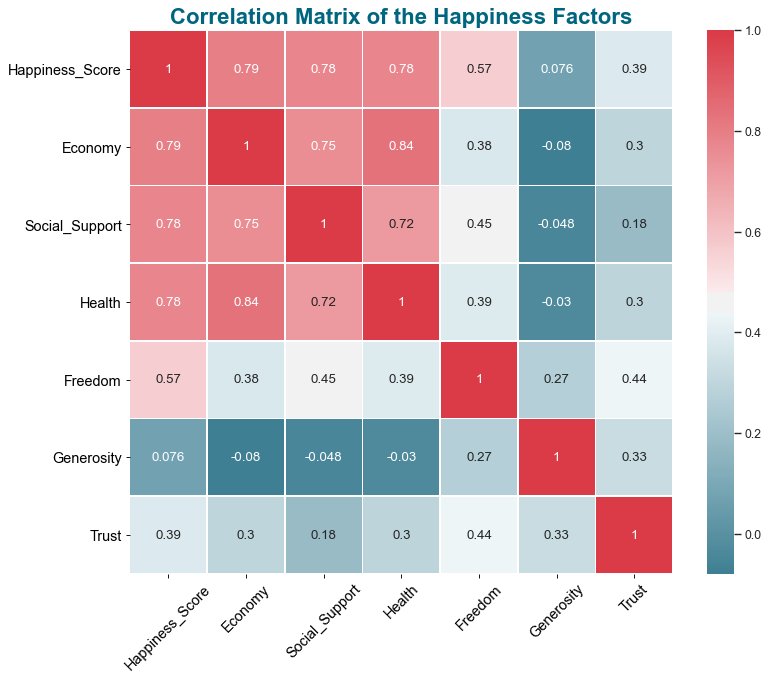

In [18]:
df3 = df2.drop(['Happiness_Rank'], 1) #drop as rank and score are dependent variables

#Visualize Correlation

fig_dims = (11, 9)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #set the plot structure

#2015
sns.set(style="white")
sns.heatmap(df3.corr(), cbar = True, square = True, annot=True, cmap=cmap, linewidths = .5)

ax.set_title('Correlation Matrix of the Happiness Factors', color='#006680', fontweight='bold', fontsize=20,)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)
plt.show()

In [19]:
Top_10 = []

for rank in df2['Happiness_Rank']:
    if rank <= 10:
        Top_10.append(1)
    else:
        Top_10.append(0)

In [20]:
df2['Top_10'] = Top_10
df2.head(10)

,Country,Continent,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust,Top_10
0,Finland,Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,Denmark,Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,Norway,Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,Iceland,Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,Netherlands,Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1
5,Switzerland,Europe,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,1
6,Sweden,Europe,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,1
7,New Zealand,Oceania,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,1
8,Canada,North America,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,1
9,Austria,Europe,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226,1


In [21]:
df2.tail(10)

,Country,Continent,Happiness_Rank,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust,Top_10
146,Haiti,North America,147,3.597,0.323,0.688,0.449,0.026,0.419,0.110,0
147,Botswana,Africa,148,3.488,1.041,1.145,0.538,0.455,0.025,0.100,0
148,Syria,Asia,149,3.462,0.619,0.378,0.440,0.013,0.331,0.141,0
149,Malawi,Africa,150,3.410,0.191,0.560,0.495,0.443,0.218,0.089,0
150,Yemen,Asia,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077,0
151,Rwanda,Africa,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,Tanzania,Africa,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,Afghanistan,Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,Central African Republic,Africa,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0
155,South Sudan,Africa,156,2.853,0.306,0.575,0.295,0.010,0.202,0.091,0


In [22]:
df_sort_happiness = df2.sort_values(by = ["Happiness_Score"])

In [23]:
top10_countries = df_sort_happiness["Country"].tail(10).values
bottom10_countries = df_sort_happiness["Country"].head(10).values

In [24]:
min_max_scaler = preprocessing.MinMaxScaler() #normalise to make variables comparable 
columns = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust']
df_sort_happiness = df_sort_happiness[columns]
df_sort_happiness = df_sort_happiness.dropna()
df_sort_happiness = pd.DataFrame(min_max_scaler.fit_transform(df_sort_happiness[columns]), columns = columns)

In [25]:
df_sort_happiness.columns = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust']
df_sort_happiness.shape

(156, 6)

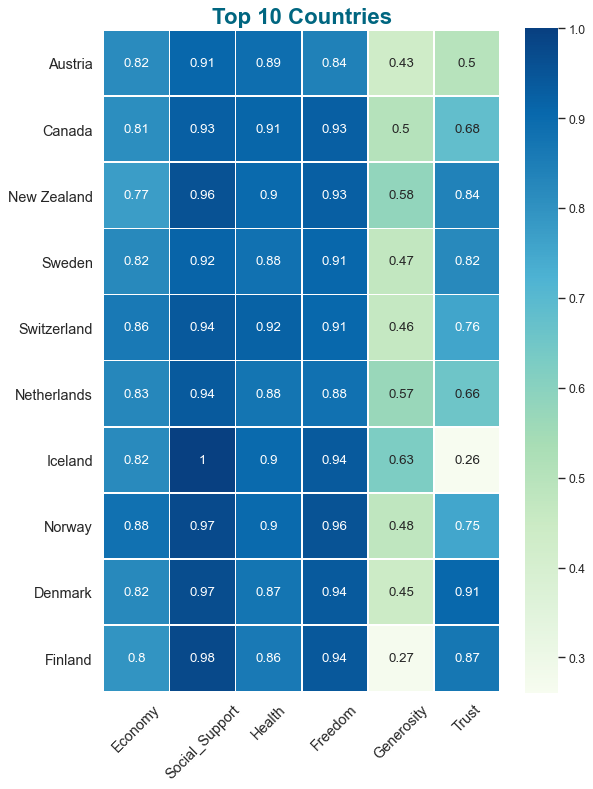

In [26]:
df_top10 = df_sort_happiness.tail(10)

Index = top10_countries 
Cols = list(df_top10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_top10_heat = pd.DataFrame(df_top10.values,index = Index, columns = Cols)
sns.heatmap(df_top10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Top 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)

plt.savefig('Top10_Happiness.png')

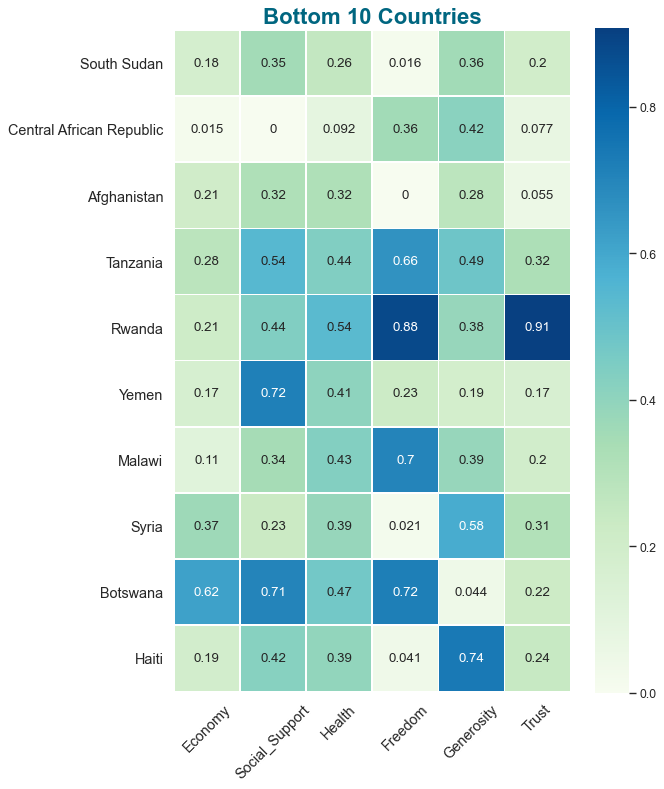

In [27]:
df_bottom10 = df_sort_happiness.head(10)

Index = bottom10_countries 
Cols = list(df_bottom10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_bottom10_heat = pd.DataFrame(df_bottom10.values,index = Index, columns = Cols)
sns.heatmap(df_bottom10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Bottom 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)

plt.savefig('Bottom10_Happiness.png')

### Clustering of the Top 10 countries

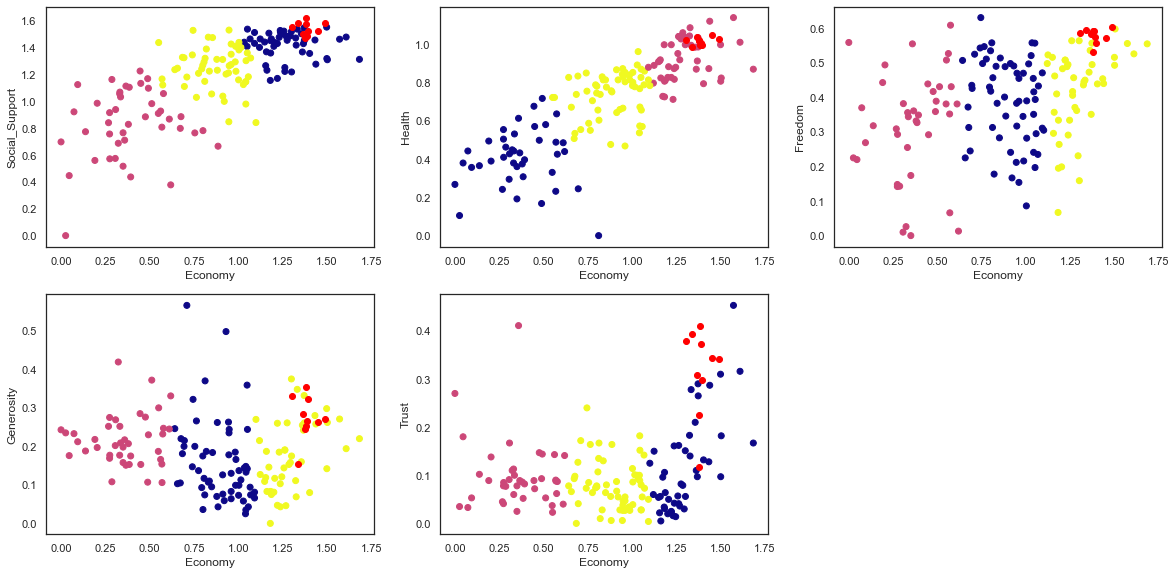

In [28]:
cols = ['Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust']

plt.figure(figsize = (20, 15))
for column in cols:
    index = cols.index(column)
    plt.subplot(3, 3, index + 1)
    
    # get countries that are ranked below 10
    X = df2[['Economy', column]][df2['Top_10'] == 0]
    kmeans = KMeans(n_clusters=3).fit(X)
    predict = kmeans.predict(X)

    # get countries that are above 10
    Top_10 = df2[['Economy', column]][df2['Top_10'] == 1]

    # plot both data together
    plt.scatter(X['Economy'], X[column], c = predict, cmap='plasma')
    plt.scatter(Top_10['Economy'], Top_10[column], c = 'red')
    plt.ylabel(column)
    plt.xlabel('Economy')
plt.show()

### Frequency and Distribution of Data

In [29]:
df2[['Happiness_Score', 'Economy','Social_Support', 'Health', 'Freedom', 'Generosity','Trust']].describe()

,Happiness_Score,Economy,Social_Support,Health,Freedom,Generosity,Trust
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Frequency and Distribution of Data


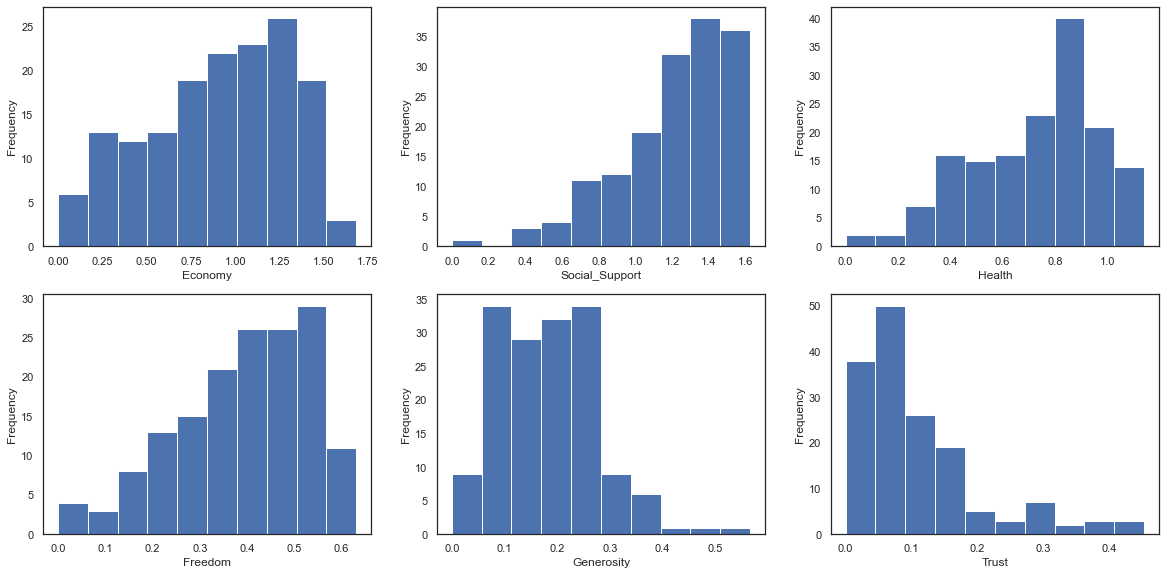

In [30]:
cols = ['Economy', 'Social_Support', 'Health', 'Freedom', 'Generosity', 'Trust']
print("Frequency and Distribution of Data")

plt.figure(figsize = (20, 15))
for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.hist(df2[cols[num]])
    plt.ylabel('Frequency')
    plt.xlabel(cols[num])
plt.show()

## Predicting the Happiness Score

Using Linear Regression Model, we will create a model that can predict the Happiness Score. 
The succeeding visualizations display how the factors are related to the Happiness Score.

In [31]:
X = df2[['Happiness_Score','Economy','Social_Support','Health','Freedom', 'Generosity','Trust']] #Subsetting the data
Y = X #Subsetting for future use

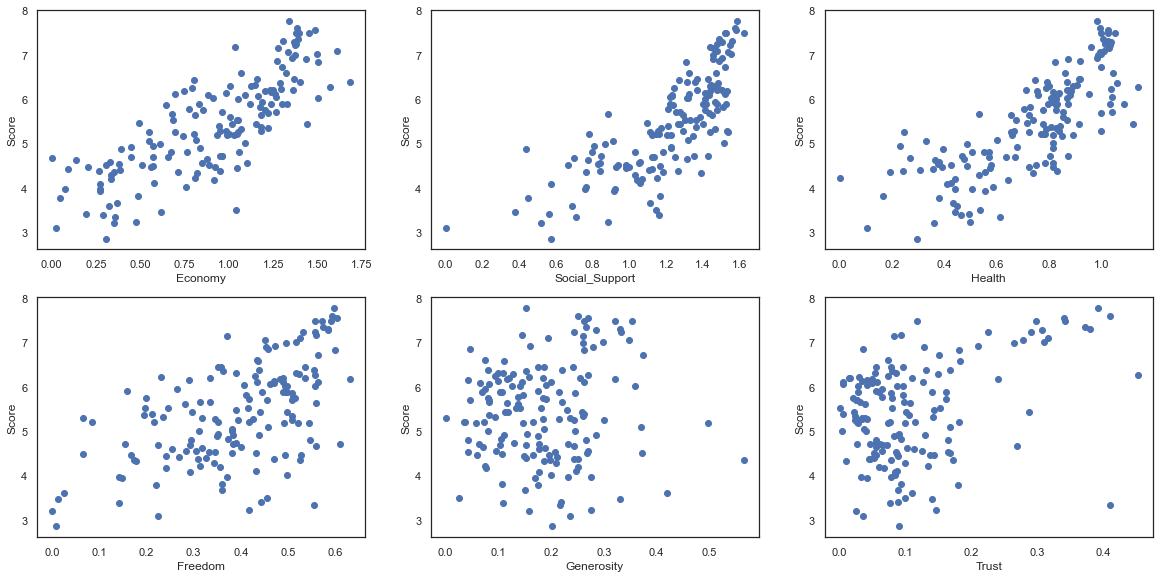

<Figure size 432x288 with 0 Axes>

In [32]:
sns.set_style("white")

cols = ['Economy','Social_Support', 'Health', 'Freedom', 'Generosity','Trust']

plt.figure(figsize = (20, 15))

for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.scatter(df2[cols[num]], df2['Happiness_Score'])
    plt.ylabel('Score')
    plt.xlabel(cols[num])
    
plt.show()
plt.savefig('LinearRegression_Happiness.png')

In [33]:
# get R^2
for var in cols:
    lin_reg = LinearRegression().fit(df2[[var]], df2['Happiness_Score'])
    print("R-squared for {}: {}".format(var, round(lin_reg.score(df2[[var]], df2['Happiness_Score']), 4)))

R-squared for Economy: 0.6303
R-squared for Social_Support: 0.6038
R-squared for Health: 0.6082
R-squared for Freedom: 0.3212
R-squared for Generosity: 0.0057
R-squared for Trust: 0.1487


## Build the Model: Linear Regression

The three key factors with the highest correlation scores against Happiness scores are:

- Economy(GDP per Capita)
- Social Support
- Healthy Life Expectancy

These will be the independent variables. Happiness score is the dependent variable.

To verify the distribution of the data:

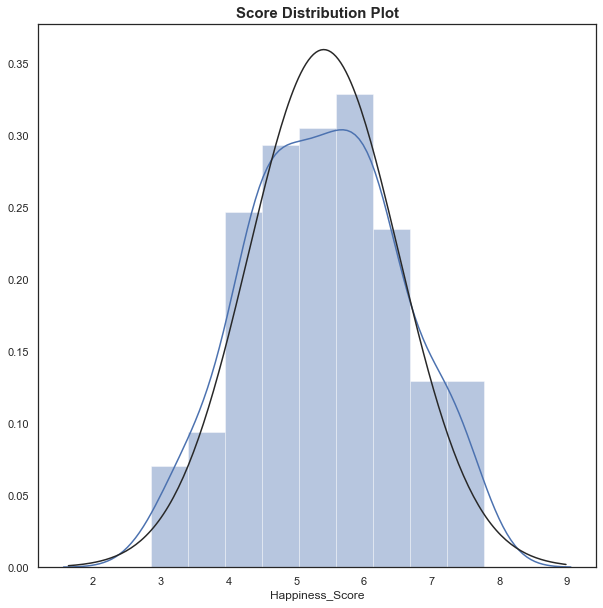

In [34]:
#Model Prediction
model = df2[['Happiness_Score','Economy','Social_Support','Health','Freedom', 'Generosity','Trust']] #Subsetting the data

plt.figure(figsize=(10,10))
sns.distplot(Y['Happiness_Score'], fit = norm)
plt.title("Score Distribution Plot",size=15, weight='bold')
plt.savefig('NormalDistribution_Happiness.png')
plt.show()

The data is normally distributed. We can now proceed in building the linear regression model.

We split the data into training and test sets. The linear model is trained using the training data set and the test data is used to predict the Happiness Score.

#### Split the Dataset into Train and Test

In [35]:
#Split the dataset to training and testing set

#Lets consider TV and radio to determine the advertising sales
df2_train, df2_test = train_test_split(df2, test_size=0.3, random_state=1)

x_train = df2_train[['Economy','Social_Support', 'Health']]
y_train = df2_train['Happiness_Score']

x_test = df2_test[['Economy','Social_Support', 'Health']]
y_test = df2_test['Happiness_Score']

#### Scale the Dataset

In [36]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = StandardScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

#Optional:
#Convert to DataFrame for viewing
x_train_sdf = pd.DataFrame(x_train_s, columns=x_train.columns, index=x_train.index)

#Convert to DataFrame for viewing
x_test_sdf = pd.DataFrame(x_test_s, columns=x_test.columns, index=x_test.index)

In [37]:
x_train_sdf.head()

,Economy,Social_Support,Health
104,-0.416491,-0.609523,-0.744852
135,-1.537161,-0.480722,-1.199738
77,0.053049,-0.008453,0.493451
18,1.318991,0.800679,0.615596
48,0.877987,0.027875,1.323197


#### Train the Model

In [38]:
#Instantiate the Linear Regression Algorithm
linreg = linear_model.LinearRegression()

#Train the Model
linreg.fit(x_train_sdf, y_train)

LinearRegression()

##### Get the Coefficients

In [39]:
pd.DataFrame(linreg.coef_, index=x_train.columns, columns=['Coef'])

,Coef
Economy,0.388840
Social_Support,0.362617
Health,0.303402


### Validate the Model

In [40]:
# Predict the values
y_pred = linreg.predict(x_test_sdf)

In [41]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

r2: 0.72
mae: 0.46
mse: 0.29
rmse: 0.54


In [42]:
lm_results = pd.DataFrame(y_test)
lm_results["Predicted"] = y_pred
lm_results.head()

,Happiness_Score,Predicted
117,4.534,3.980632
75,5.430,6.538951
51,6.008,5.929947
31,6.300,5.886248
35,6.223,6.540318


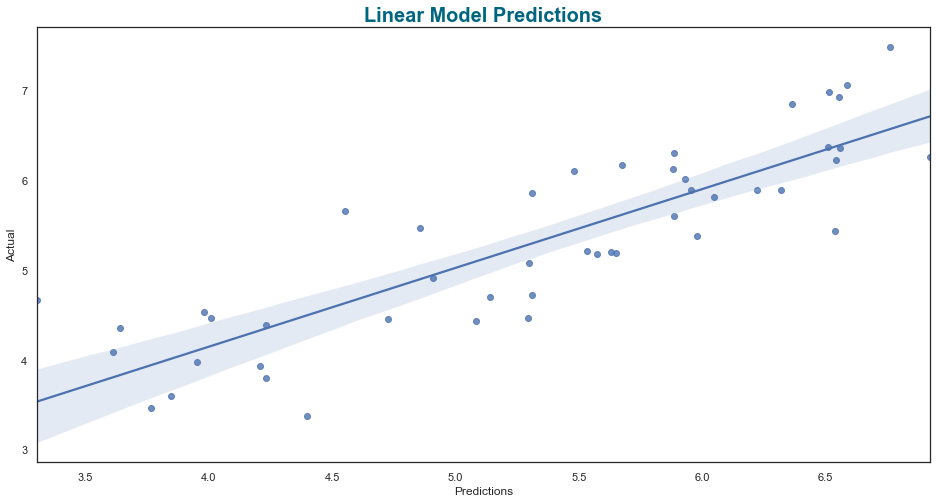

In [43]:
#Plotting the linear regression model
plt.figure(figsize=(16,8))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions", color='#006680', fontweight='bold', fontsize=20)
plt.grid(False)
plt.savefig('LinearModelPrediction.png')
plt.show()

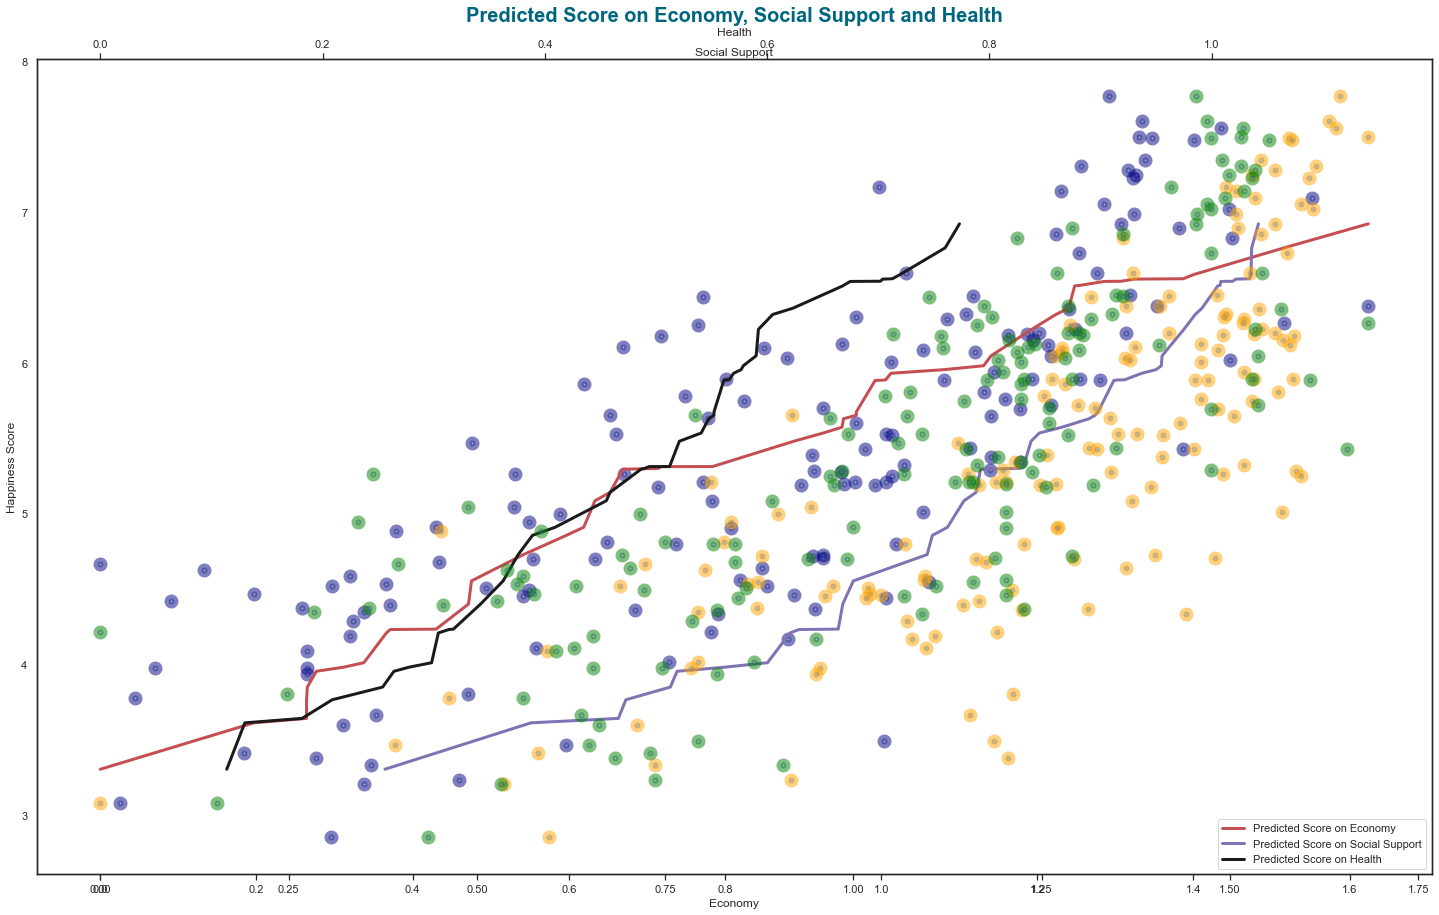

In [44]:
#Visualize the Results

fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax3 = ax2.twiny()

x_test_sort_economy = x_test.Economy.sort_values()
x_test_sort_social_support = x_test.Social_Support.sort_values()
x_test_sort_health = x_test.Health.sort_values()
predict_sort = pd.Series(y_pred, index = x_test.index).sort_values()

ax1.scatter(df2["Economy"], df2["Happiness_Score"],edgecolor="navy", alpha=0.5, linewidths=8)
ax2.scatter(df2["Social_Support"], df2["Happiness_Score"], edgecolor="orange", alpha=0.5, linewidths=8)
ax3.scatter(df2["Health"], df2["Happiness_Score"], edgecolor="green", alpha=0.5, linewidths=8)

ax1.plot(x_test_sort_economy, predict_sort, color="r", label = "Predicted Score on Economy", linewidth=3)
ax1.plot(x_test_sort_social_support, predict_sort, color="m", label = "Predicted Score on Social Support", linewidth=3)
ax1.plot(x_test_sort_health, predict_sort, color="k", label = "Predicted Score on Health", linewidth=3)

ax1.set_xlabel("Economy")
ax1.set_ylabel("Happiness Score")
ax2.set_xlabel("Social Support")
ax3.set_xlabel("Health")

ax1.legend(loc='lower right')
plt.title('Predicted Score on Economy, Social Support and Health', color='#006680', fontweight='bold', fontsize=20,)
plt.savefig('PredictedScores_Happiness.png')
plt.show()